# 第十三章   后半部分

# 上次作业存留问题

In [63]:
import csv
import random
import datetime

fn = 'data.csv'

with open(fn, 'w') as fp:
    wr = csv.writer(fp)                      # 创建csv文件写入对象
    wr.writerow(['日期', '销量'])             # 写入表头
    startDate = datetime.date(2017, 1, 1)    # 起始日期

    # 生成365个模拟数据，可以根据需要进行调整
    for i in range(365):
        # 生成一个模拟数据，写入csv文件
        amount = 300 + i*5 + random.randrange(100)
        wr.writerow([str(startDate), amount])
        # 下一天
        startDate = startDate + datetime.timedelta(days=1)


<Figure size 432x288 with 0 Axes>

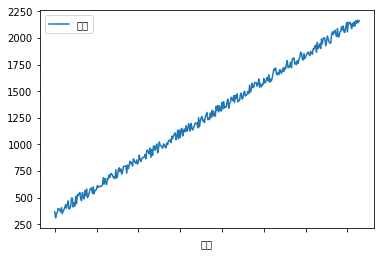

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据，丢弃缺失值
df = pd.read_csv('data.csv', encoding='cp936')
df = df.dropna()

# 生成营业额折线图
plt.figure()
df.plot(x='日期')
plt.savefig('first.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

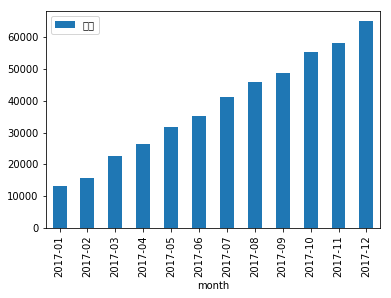

In [65]:
# 按月统计，生成柱状图
plt.figure()
df1 = df[:]
df1['month'] = df1['日期'].map(lambda x: x[:x.rindex('-')])
df1 = df1.groupby(by='month', as_index=False).sum()
df1.plot(x='month', kind='bar')
plt.savefig('second.jpg')

<Figure size 432x288 with 0 Axes>

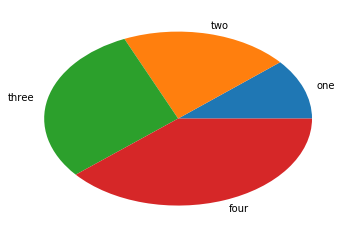

In [66]:
# 查找涨幅最大的月份，写入文件
plt.figure()
df2 = df1.drop('month', axis=1).diff()
m = df2['销量'].nlargest(1).keys()[0]
with open('maxMonth.txt', 'w') as fp:
    fp.write(df1.loc[m, 'month'])
    
    
# 按季度统计，生成饼状图
plt.figure()
one = df1[:3]['销量'].sum()
two = df1[3:6]['销量'].sum()
three = df1[6:9]['销量'].sum()
four = df1[9:12]['销量'].sum()
plt.pie([one, two, three, four],labels=['one', 'two', 'three', 'four'])
plt.savefig('third.jpg')

# 13.4  统计分析模块statistics

# （1）计算平均数函数mean()

In [5]:
>>> import statistics
>>> statistics.mean([1, 2, 3, 4, 5, 6, 7, 8, 9])
                                         # 使用整数列表做参数

5

In [6]:
>>> statistics.mean(range(1,10))         # 使用range对象做参数

5

In [7]:
>>> import fractions
>>> x = [(3, 7), (1, 21), (5, 3), (1, 3)]
>>> y = [fractions.Fraction(*item) for item in x]
>>> y

[Fraction(3, 7), Fraction(1, 21), Fraction(5, 3), Fraction(1, 3)]

In [8]:
>>> statistics.mean(y)         # 使用包含分数的列表做参数

Fraction(13, 21)

In [9]:
>>> import decimal
>>> x = ('0.5', '0.75', '0.625', '0.375')
>>> y = map(decimal.Decimal, x)
>>> statistics.mean(y)         # 使用包含高精度实数的map对象做参数

Decimal('0.5625')

# （2）中位数函数median()、median_low()、median_high()、median_grouped()

In [10]:
>>> statistics.median([1, 3, 5, 7])       # 偶数个样本时取中间两个数的平均数

4.0

In [11]:
>>> statistics.median_low([1, 3, 5, 7])   # 偶数个样本时取中间两个数的较小者

3

In [12]:
>>> statistics.median_high([1, 3, 5, 7])  # 偶数个样本时取中间两个数的较大者

5

In [13]:
>>> statistics.median(range(1,10))

5

In [29]:
>>> statist`ics.median_low([5, 3, 7]), statistics.median_high([5, 3, 7])

(5, 5)

statistics.median_grouped

用组距式来求中位数
中位数=中位数所在组下限+{[(样本总数/2-到中位数所在组下限的累加次数)/中位数所在组的次数]*中位数的组距}

In [16]:
>>> statistics.median_grouped([5, 3, 7])

5.0

In [17]:
>>> statistics.median_grouped([52, 52, 53, 54])

52.5

In [18]:
>>> statistics.median_grouped([1, 3, 3, 5, 7])

3.25

In [19]:
>>> statistics.median_grouped([1, 2, 2, 3, 4, 4, 4, 4, 4, 5])

3.7

In [24]:
>>> statistics.median_grouped([1, 2, 2, 3, 4, 4, 4, 4, 4, 5], interval=2)

3.4

# （3）返回最常见数据或出现次数最多的数据（most common data）的函数mode()

In [25]:
>>> statistics.mode([1, 3, 5, 7]) # 无法确定出现次数最多的唯一元素

StatisticsError: no unique mode; found 4 equally common values

In [22]:
>>> statistics.mode([1, 3, 5, 7, 3])

3

In [23]:
>>> statistics.mode(["red", "blue", "blue", "red", "green", "red", "red"])

'red'

# （4）pstdev()，返回总体标准差（population standard deviation ，the square root of the population variance)。

In [27]:
>>> statistics.pstdev([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])

0.986893273527251

In [28]:
>>> statistics.pstdev(range(20))

5.766281297335398

# （5）pvariance()，返回总体方差（population variance）或二次矩（second moment）。

In [30]:
>>> statistics.pvariance([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])

0.9739583333333334

In [31]:
>>> x = [1, 2, 3, 4, 5, 10, 9, 8, 7, 6]
>>> mu = statistics.mean(x)
>>> mu

5.5

In [32]:
>>> statistics.pvariance([1, 2, 3, 4, 5, 10, 9, 8, 7, 6], mu)

8.25

In [33]:
>>> statistics.pvariance(range(20))

33.25

In [37]:
import random 
>>> statistics.pvariance((random.randint(1,10000) for i in range(30)))

7491443.782222223

# （6）variance()、stdev()，计算样本方差（sample variance）和样本标准差（sample standard deviation，the square root of the sample variance，也叫均方差）。

In [42]:
>>> statistics.variance(range(20))

35.0

In [43]:
>>> statistics.stdev(range(20))

5.916079783099616

In [44]:
>>> _ * _

35.0

In [45]:
>>> lst = [3, 3, 3, 3, 3, 3]
>>> statistics.variance(lst), statistics.stdev(lst)

(0, 0.0)

# 13.5 matplotlib简单应用

# 绘制带有中文标签和图例的图

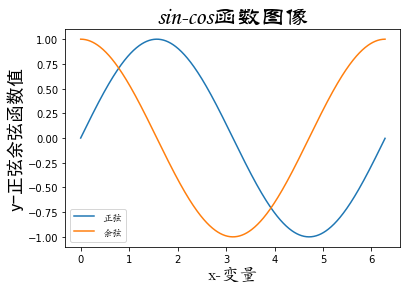

In [49]:
import numpy as np
import pylab as pl
import matplotlib.font_manager as fm

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\STKAITI.ttf') #设置字体
t = np.arange(0.0, 2.0*np.pi, 0.01)                       # 自变量取值范围
s = np.sin(t)                                             # 计算正弦函数值
z = np.cos(t)                                             # 计算余弦函数值
pl.plot(t, s, label='正弦')                    # 注释
pl.plot(t, z, label='余弦')                   # 注释
pl.xlabel('x-变量', fontproperties='STKAITI', fontsize=18) # 设置x标签
pl.ylabel('y-正弦余弦函数值', fontproperties='simhei', fontsize=18)  # 设置y标签
pl.title('sin-cos函数图像', fontproperties='STLITI', fontsize=24)   # 设置title
pl.legend(prop=myfont)                                                          # 设置图例
pl.show()

# 绘制散点图

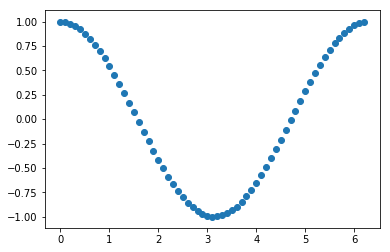

In [50]:
>>> a = np.arange(0, 2.0*np.pi, 0.1)      #生成数组
>>> b = np.cos(a)                       # 计算余弦函数值
>>> pl.scatter(a,b)      # 画散点图
>>> pl.show()

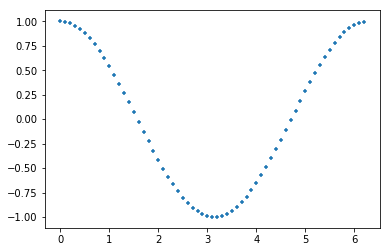

In [51]:
>>> pl.scatter(a,b,s=20,marker='+')  #修改散点符号与大小
>>> pl.show()

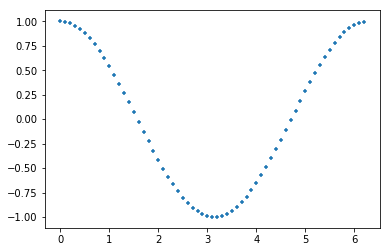

In [52]:
>>> pl.scatter(a,b,s=20,linewidths=5,marker='+')  #修改线宽
>>> pl.show()

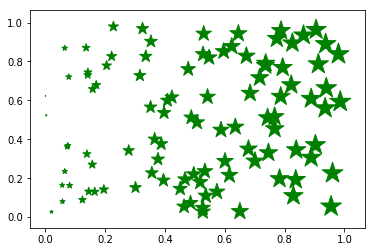

In [54]:
# 修改颜色
>>> import matplotlib.pylab as pl
>>> import numpy as np
>>> x = np.random.random(100)
>>> y = np.random.random(100)
>>> pl.scatter(x,y,s=x*500,c=u'g',marker=u'*')
# s指大小，c指颜色，marker指符号形状
# b-blue c-cyan g-green k-black m-magemta r-red w-white y-yellow
>>> pl.show()

# 绘制饼状图

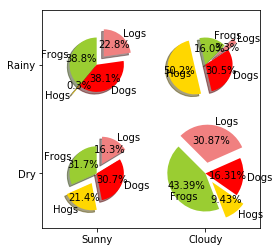

In [57]:
import numpy as np
import matplotlib.pyplot as plt

#The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
colors = ['yellowgreen', 'gold', '#FF0000', 'lightcoral']
explode = (0, 0.1, 0, 0.1)              # 使饼状图中第2片和第4片裂开

fig = plt.figure()
ax = fig.gca()
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 0), frame=True)   # autopct设置饼内百分比的格式
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=45,
       radius=0.25, center=(1, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.2f%%', shadow=False, startangle=135,
       radius=0.35, center=(1, 0), frame=True)
ax.set_xticks([0, 1])                    # 设置坐标轴刻度
ax.set_yticks([0, 1])

ax.set_xticklabels(["Sunny", "Cloudy"])  # 设置坐标轴刻度上的标签
ax.set_yticklabels(["Dry", "Rainy"])

ax.set_xlim((-0.5, 1.5))                 # 设置坐标轴跨度
ax.set_ylim((-0.5, 1.5))

ax.set_aspect('equal')                   # 设置纵横比相等

plt.show()


# 使用pyplot绘制，多个图形在一起显示

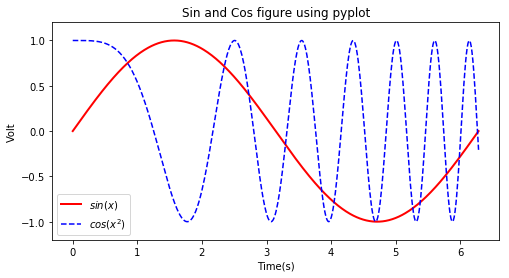

In [58]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 2*np.pi, 500)
y = np.sin(x)
z = np.cos(x*x)
plt.figure(figsize=(8,4))
# 标签前后加$将使用内嵌的LaTex引擎将其显示为公式
plt.plot(x,y,label='$sin(x)$',color='red',linewidth=2)   # 红色，2个像素宽
plt.plot(x,z,'b--',label='$cos(x^2)$')                   # 蓝色，虚线
plt.xlabel('Time(s)')
plt.ylabel('Volt')
plt.title('Sin and Cos figure using pyplot')
plt.ylim(-1.2,1.2)
plt.legend()                                         # 显示图例
plt.show()                                           # 显示绘图窗口


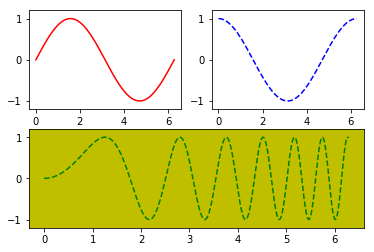

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0, 2*np.pi, 500)            # 创建自变量数组
y1 = np.sin(x)                             # 创建函数值数组
y2 = np.cos(x)
y3 = np.sin(x*x)
plt.figure(1)                              # 创建图形
ax1 = plt.subplot(2,2,1)                   # 第一行第一列图形
ax2 = plt.subplot(2,2,2)                   # 第一行第二列图形
ax3 = plt.subplot(212, facecolor='y')      # 第二行
plt.sca(ax1)                               # 选择ax1
plt.plot(x,y1,color='red')                 # 绘制红色曲线
plt.ylim(-1.2,1.2)                         # 限制y坐标轴范围
plt.sca(ax2)                               # 选择ax2
plt.plot(x,y2,'b--')                       # 绘制蓝色曲线
plt.ylim(-1.2,1.2)
plt.sca(ax3)                               # 选择ax3
plt.plot(x,y3,'g--')
plt.ylim(-1.2,1.2)
plt.show()


# 使用pyplot绘制，多个图形单独显示

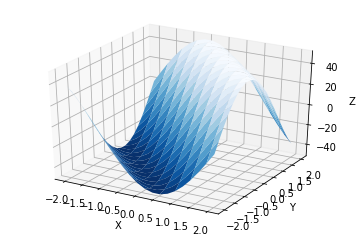

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

x,y = np.mgrid[-2:2:20j, -2:2:20j]        # 步长使用虚数
                                          # 虚部表示点的个数
                                          # 并且包含end
z = 50 * np.sin(x+y)                      # 测试数据
ax = plt.subplot(111, projection='3d')    # 三维图形
ax.plot_surface(x,y,z,rstride=2, cstride=1, cmap=plt.cm.Blues_r)
ax.set_xlabel('X')                        # 设置坐标轴标签
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


# 绘制三维图形

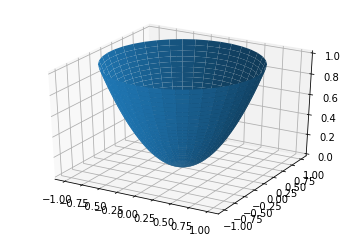

In [61]:
import pylab as pl
import numpy as np
import mpl_toolkits.mplot3d
rho, theta = np.mgrid[0:1:40j, 0:2*np.pi:40j]
z = rho**2
x = rho*np.cos(theta)
y = rho*np.sin(theta)
ax = pl.subplot(111, projection='3d')
ax.plot_surface(x,y,z)
pl.show()
